<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/tweetsAyusoprocesados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
import pandas as pd

In [ ]:
import tweepy

In [ ]:
tweetsT=pd.read_csv("/content/datosayusotwitter3.csv")

In [ ]:
tweetsT.head()

,id,text,created_at,author_id,in_reply_to_user_id,lang,author,entities,referenced_tweets,media,geo
0,1388644310657245196,@FelixLopez_Rey @IdiazAyuso la madre médica......,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1388643752680509449,@Deycivilla @IdiazAyuso Porque hay toque de qu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1388643675954192384,@nenesinosuke @Reflexi85485256 @IdiazAyuso El ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1388643418583224320,@IdiazAyuso en estos momentos gato en mano tor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1388643308973576196,@IdiazAyuso que termine pronto tu campaña. Tie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tAyuso=tweetsT.drop(columns=["id", "author_id", "author", "entities", "referenced_tweets", "media", "geo", "in_reply_to_user_id"])

In [ ]:
tAyuso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270034 entries, 0 to 270033
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   text        270034 non-null  object 
 1   created_at  0 non-null       float64
 2   lang        0 non-null       float64
dtypes: float64(2), object(1)
memory usage: 6.2+ MB


In [ ]:
tAyuso.head()

,text,created_at,lang
0,@FelixLopez_Rey @IdiazAyuso la madre médica......,NaN,NaN
1,@Deycivilla @IdiazAyuso Porque hay toque de qu...,NaN,NaN
2,@nenesinosuke @Reflexi85485256 @IdiazAyuso El ...,NaN,NaN
3,@IdiazAyuso en estos momentos gato en mano tor...,NaN,NaN
4,@IdiazAyuso que termine pronto tu campaña. Tie...,NaN,NaN


In [ ]:
tfinal["created_at"] = pd.to_datetime(tfinal["created_at"])
tfinal.info()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from textblob import TextBlob

In [ ]:
plt.style.use("fivethirtyeight")

In [ ]:
API_Key="TpOaJ2x2ZlK85Yc8nWxuj5G3c"
API_Key_Secret="bERVKBantrLO1qF8MJkAgrxeHd3NL3bHEReN8lz9KkvtYooIcO"
Access_Token="80347254-Mb585QCTiQu0WlylC7QsoXDGeY2uUKDYqPormSgcI"
Access_Token_Secret="56qrJX96Uaw8JaX5xRy4tlfPN7vipDxs3r3JDjYsr55no"
Bearer_Token="AAAAAAAAAAAAAAAAAAAAADz5ZwEAAAAA0AUj%2FHHhetSvet71ZMQhAPVJkDA%3DAgSbPsBdtPMjrdeTMiaiPcQCOBafQBkTRHH4ZkMEHnmS9QlI7v"




In [ ]:
authenticate=tweepy.OAuthHandler(API_Key, API_Key_Secret)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from textblob import TextBlob

In [ ]:
plt.style.use("fivethirtyeight")

In [ ]:
authenticate.set_access_token(Access_Token, Access_Token_Secret)

In [ ]:
import time

In [ ]:
def obtenerPolaridad(twt):
    return TextBlob(twt).sentiment.polarity

In [ ]:
#añadimos columna con la polaridad


tAyuso["Polaridad"]=tAyuso["text"].apply(obtenerPolaridad)

In [ ]:
tAyuso.tail(20)

In [61]:
tAyuso["Polaridad"].describe()

count    270034.000000
mean         -0.001951
std           0.095537
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Polaridad, dtype: float64

In [ ]:
#añadimos función para clasififcar 

def ObtenerOpinion (valor):
    if valor>0:
        return "Positivo"
    elif valor<0:
        return "Negativo"
  

In [ ]:
tAyuso["Opinión"]=tAyuso["Polaridad"].apply(ObtenerOpinion)

In [65]:
tAyuso["Opinión"].value_counts()

Positivo    7007
Negativo    4519
Name: Opinión, dtype: int64

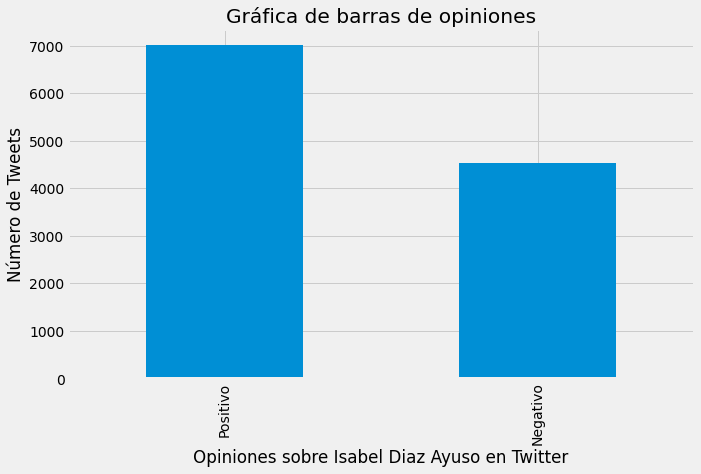

In [62]:
plt.figure(figsize=(10,6))

tAyuso["Opinión"].value_counts().plot(kind="bar")

plt.title("Gráfica de barras de opiniones")
plt.xlabel("Opiniones sobre Isabel Diaz Ayuso en Twitter")
plt.ylabel("Número de Tweets")
plt.show()

In [ ]:
tAyuso["Polaridad"].mean()

-0.0019513241998636425

In [ ]:
df_pordia=tfinal.groupby(by=tfinal["created_at"].dt.date).mean()

In [ ]:
df_pordia.info()

In [ ]:
df_pordia.to_csv("datospolaridadteslatwitter.csv")

In [64]:
tAyuso.Polaridad.isnull().sum()



0

In [ ]:
neutros = tAyuso["Polaridad"] == 0